In [37]:
#IMPORTING LIBRARIES AND DATASETS

import pandas as pd
import plotly.express as px

merged_dataset = pd.read_csv('atlas_merged.csv',low_memory=False)

In [38]:
# Function to visualize most recorded species by continent, grouped by Isolate Id
def visualize_continent_distribution(merged_dataset, continent):
    # Filter the DataFrame to include only records for the specified continent
    df_filtered = merged_dataset[merged_dataset['Continents'] == continent]
    
    # Group by Isolate Id and Species
    df_unique = df_filtered.groupby(['Isolate Id', 'Species']).first().reset_index()
    
    # Count the number of unique Isolate Ids for each species and genotype
    df_species_distribution = df_unique.groupby(['Species', 'Gene Class']).size().reset_index(name='Count')
    
    # Sort by count in descending order
    df_species_distribution = df_species_distribution.sort_values(by='Count', ascending=False)
    
    # Create a bar plot with Plotly
    fig = px.bar(df_species_distribution, 
                 x='Species', 
                 y='Count', 
                 color='Gene Class', 
                 title=f'Distribution of Genotypic Data by Species in {continent}',
                 labels={'Count': 'Number of Records', 'Species': 'Species'},
                 color_discrete_map={'ESBL': '#e15759', 'Carbapenemase': '#76b7b2', 'AMPC beta-lactamase': '#af7aa1', 'Beta-lactamase':'#4e79a7'})

    # Update layout to rotate x-axis labels and adjust size
    fig.update_layout(xaxis_title='Species', yaxis_title='Number of Records', 
                      xaxis={'categoryorder':'total descending'},
                      height=1000, width=1000)

    # Show the plot
    fig.show()


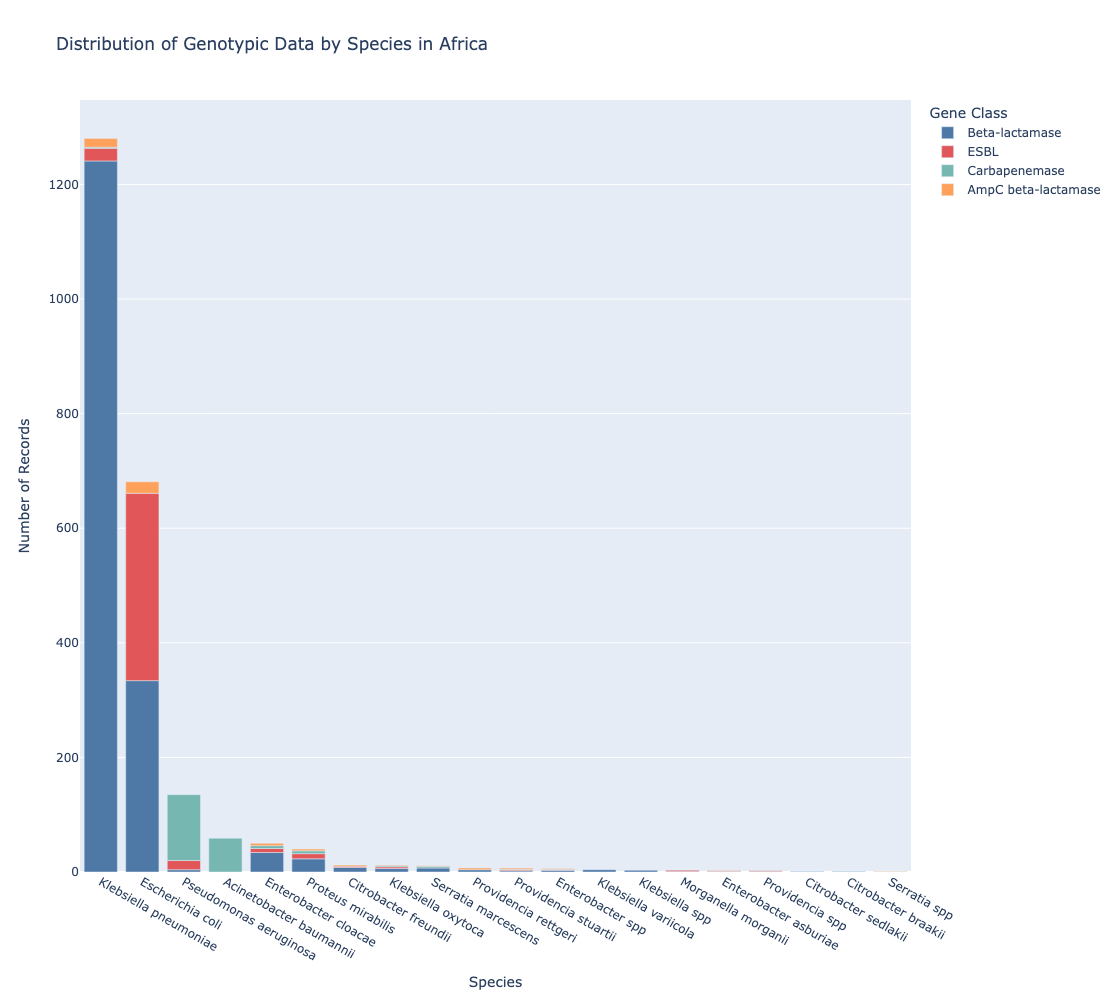

In [39]:
visualize_continent_distribution(merged_dataset,'Africa')


In [40]:
# visualize species distribution across all continents, grouped by Isolate Id
def visualize_global_species_distribution(merged_dataset):
    # Group by Isolate Id, Species, and Continents
    df_unique = merged_dataset.groupby(['Isolate Id', 'Species', 'Continents']).first().reset_index()

    # Count the number of unique Isolate Ids for each species and continent
    df_global_distribution = df_unique.groupby(['Species', 'Continents']).size().reset_index(name='Count')

    # Sort by count in descending order
    df_global_distribution = df_global_distribution.sort_values(by='Count', ascending=False)

    # Define the custom color scale
    color_scale = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f', 
                   '#edc949', '#af7aa1', '#ff9da7', '#9c755f', '#bab0ac']

    # Create a bar plot with Plotly
    fig = px.bar(df_global_distribution, 
                 x='Species', 
                 y='Count', 
                 color='Continents', 
                 title='Distribution of Genotypic Data by Species Across All Continents',
                 labels={'Count': 'Number of Records', 'Species': 'Species', 'Continents': 'Continent'},
                 color_discrete_sequence=color_scale)

    # Update layout to rotate x-axis labels and adjust size
    fig.update_layout(xaxis_title='Species', yaxis_title='Number of Records', 
                      xaxis={'categoryorder':'total descending'},
                      height=1000, width=1000)

    # Show the plot
    fig.show()



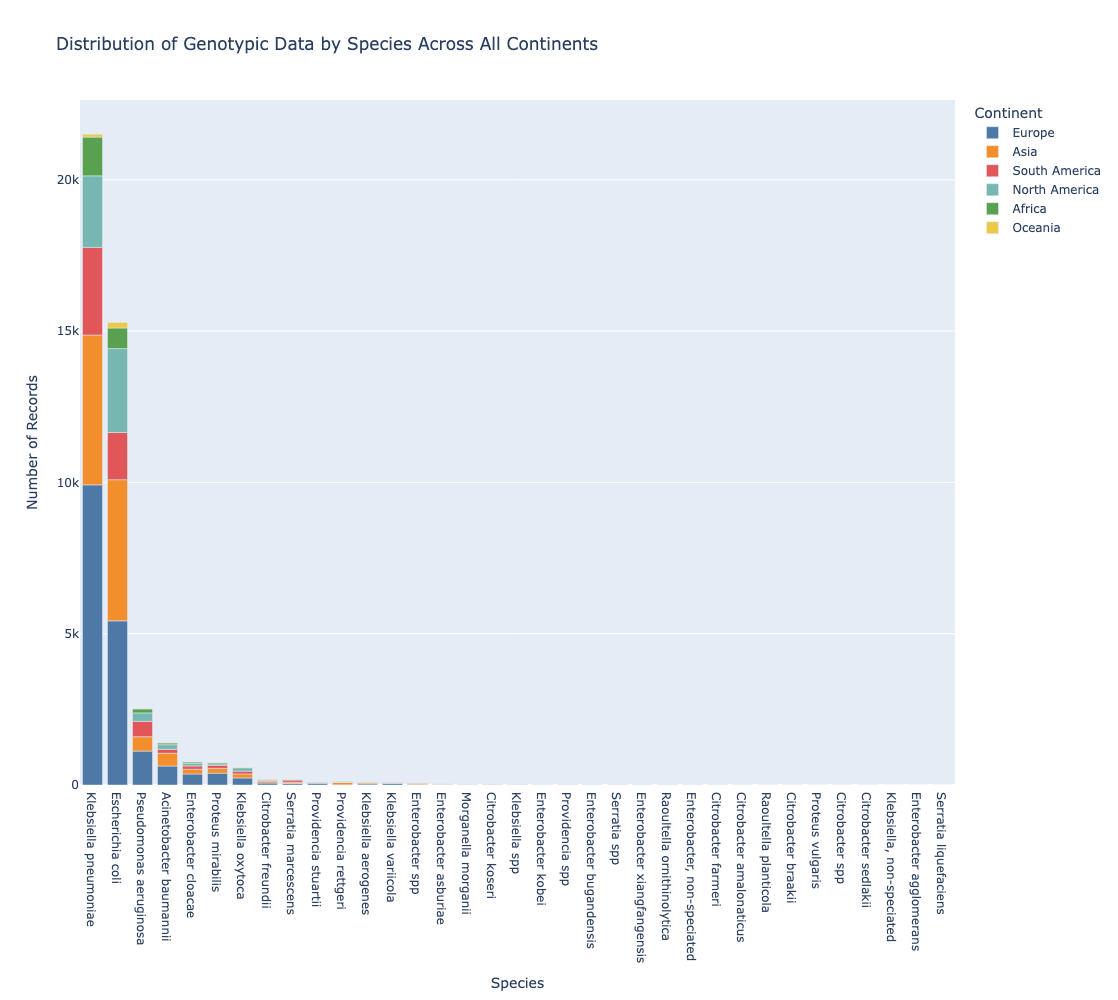

In [41]:
visualize_global_species_distribution(merged_dataset)

In [42]:
def visualize_records_per_continent(merged_dataset):
    # Group by Isolate Id, Continents, and Gene Class to avoid counting the same Isolate multiple times
    df_unique = merged_dataset.groupby(['Isolate Id', 'Continents', 'Gene Class']).first().reset_index()

    # Count the number of unique Isolate Ids for each continent and gene class
    df_continent_records = df_unique.groupby(['Continents', 'Gene Class']).size().reset_index(name='Count')

    # Sort by count in descending order
    df_continent_records = df_continent_records.sort_values(by='Count', ascending=False)

    # Define the custom color scale
    color_scale = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f', 
                   '#edc949', '#af7aa1', '#ff9da7', '#9c755f', '#bab0ac']

    # Create a bar plot with Plotly
    fig = px.bar(df_continent_records, 
                 x='Continents', 
                 y='Count', 
                 color='Gene Class',  # Use Gene Class as the legend
                 title='Distribution of Genotypic Data Records by Continent',
                 labels={'Count': 'Number of Records', 'Continents': 'Continent', 'Gene Class': 'Gene Class'},
                 color_discrete_sequence=color_scale)

    # Update layout to adjust size
    fig.update_layout(xaxis_title='Continent', yaxis_title='Number of Records', 
                      height=1000, width=1000)

    # Show the plot
    fig.show()



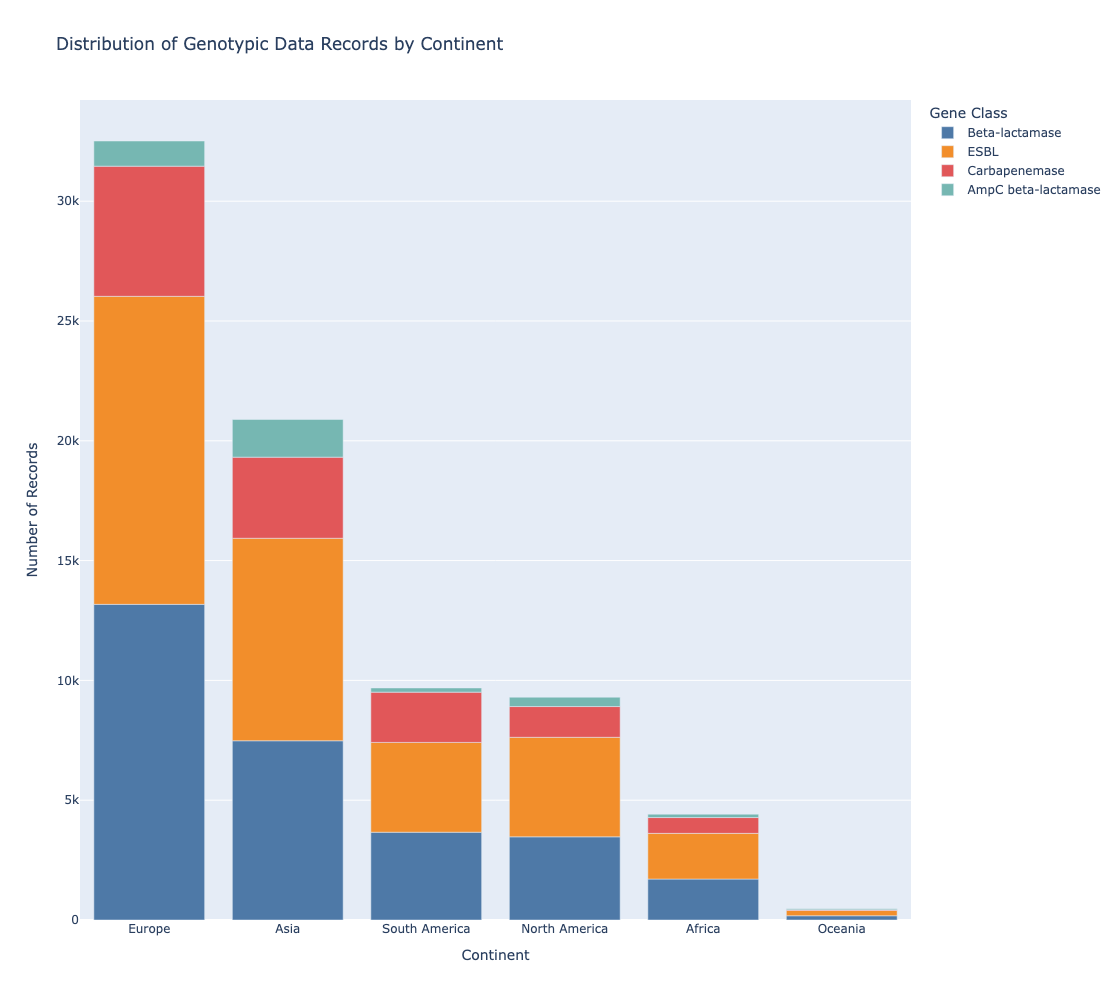

In [43]:
visualize_records_per_continent(merged_dataset)